In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

In [3]:
import pandas as pd

# Load the dataset
file_path = 'Green ICT attitudes cleaned.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
data.head()


,Respondent ID,How big is your organization?,How often do you purchase ICT equipment?,We acquire ICT equipment using the leasing procedure,We procure ICT equipment using the DaaS procedure (device as a service),We acquire ICT equipment by purchasing,Do you consider used equipment as an option when you make ICT equipment procurement decisions?,Information security matters,Matters related to the guarantee,Things related to the condition of the device,...,What are the other main reasons that influence the purchase of used equipment?,How important is price in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important),Has your ICT procurement budget tightened in the last two years?,How important is responsibility in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important),Will the share of responsibility factors increase in your ICT equipment procurement decisions in the next two years?,What factors affect the growth of the share of responsibility factors in your ICT equipment procurement decisions?,"Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?",What information do you receive from your equipment supplier for your responsibility work?,What information do you want to receive from your equipment supplier for your responsibility work?,How likely do you see purchases of used ICT equipment to increase in the future in your organization? (0 Not at all | 5 Definitely)
0,1,1,5,0,0,1,1,8.0,4.0,9.0,...,NaN,7.0,2,5.0,2.0,NaN,2.0,NaN,NaN,4.0
1,2,4,1,1,0,1,1,11.0,8.0,11.0,...,NaN,10.0,1,9.0,1.0,All relevant,1.0,"CO2 measurements, process certificates",NaN,4.0
2,3,3,1,0,0,1,1,8.0,6.0,NaN,...,NaN,9.0,1,7.0,1.0,NaN,1.0,"co2, what happens to the returnees",NaN,2.0
3,4,1,5,0,0,1,1,NaN,6.0,9.0,...,NaN,10.0,2,7.0,2.0,NaN,2.0,NaN,NaN,5.0
4,5,4,1,1,0,0,2,4.0,11.0,NaN,...,Our volume is tens of thousands of devices eve...,8.0,1,8.0,1.0,Regulation and the company's strategic goals.,2.0,NaN,Reasonably accurate data on the emissions of p...,4.0


In [4]:
# Descriptive statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# key quantitative variables
variables = {
    'importance_of_price': 'How important is price in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)',
    'importance_of_responsibility': 'How important is responsibility in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)',
    'likelihood_of_increased_used_ict_purchases': 'How likely do you see purchases of used ICT equipment to increase in the future in your organization? (0 Not at all | 5 Definitely)'
}

# Calculate descriptive statistics
descriptive_stats = {}
for var_name, var_col in variables.items():
    descriptive_stats[var_name] = {
        'mean': data[var_col].mean(),
        'median': data[var_col].median(),
        'mode': data[var_col].mode()[0],  # Correctly access the mode
        'std_dev': data[var_col].std()
    }

# Convert to DataFrame for better visualization
descriptive_stats_df = pd.DataFrame(descriptive_stats)
descriptive_stats_df

,importance_of_price,importance_of_responsibility,likelihood_of_increased_used_ict_purchases
mean,6.971831,5.957746,2.655738
median,7.000000,6.000000,3.000000
mode,7.000000,5.000000,3.000000
std_dev,2.042211,2.469451,1.412861


# Visualization

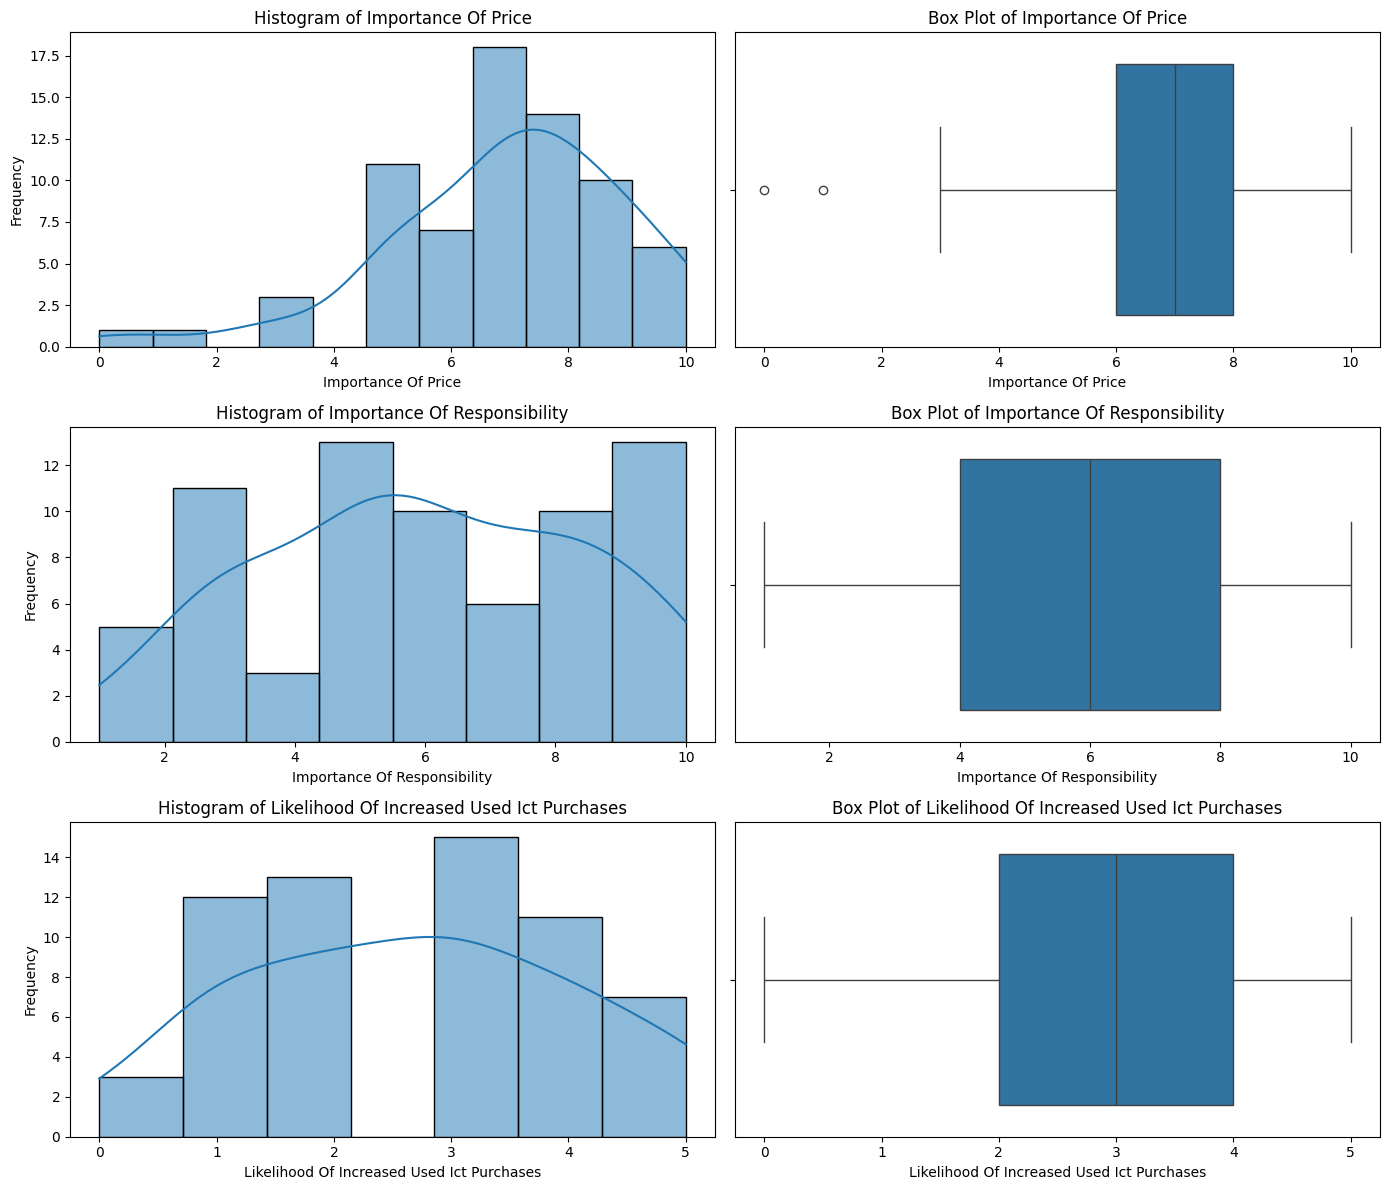

In [5]:
# Set up the matplotlib figure
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Plot histograms
for idx, (var_name, var_col) in enumerate(variables.items()):
    sns.histplot(data[var_col], kde=True, ax=axs[idx, 0])
    axs[idx, 0].set_title(f'Histogram of {var_name.replace("_", " ").title()}')
    axs[idx, 0].set_xlabel(var_name.replace("_", " ").title())
    axs[idx, 0].set_ylabel('Frequency')

# Plot box plots
for idx, (var_name, var_col) in enumerate(variables.items()):
    sns.boxplot(x=data[var_col], ax=axs[idx, 1])
    axs[idx, 1].set_title(f'Box Plot of {var_name.replace("_", " ").title()}')
    axs[idx, 1].set_xlabel(var_name.replace("_", " ").title())

plt.tight_layout()
plt.show()


# Correlation Analysis

Spearman correlation coefficient: -0.5861829463337749
P-value: 5.0730296586369404e-08


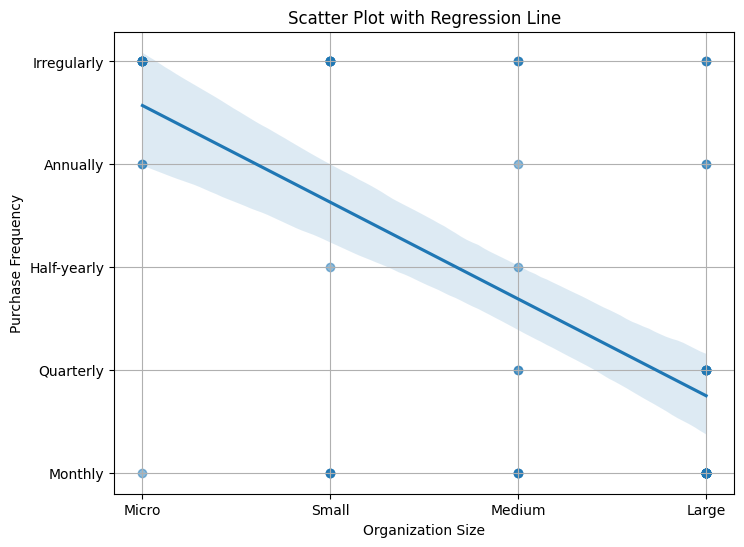

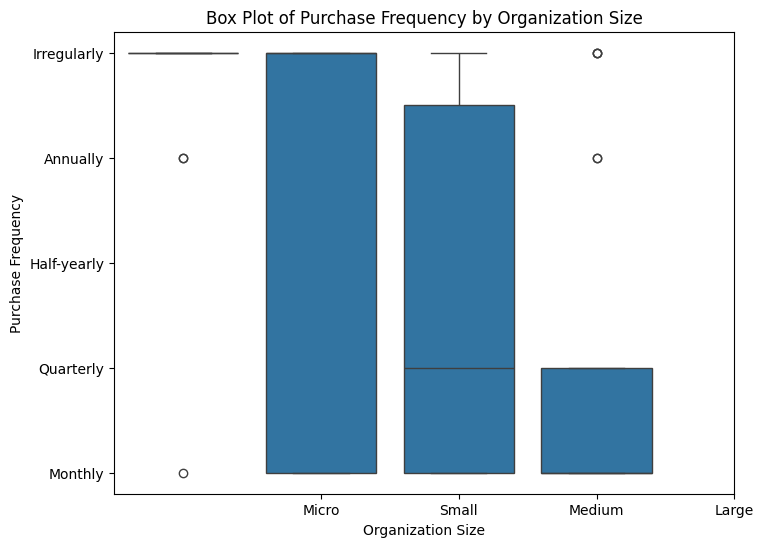

In [8]:
#library for spearman correlation
from scipy.stats import spearmanr

# columns for correlation analysis
correlation_vars = [
    'How big is your organization?',
    'How often do you purchase ICT equipment?'
]

# Create a subset of the data for correlation analysis
correlation_data = data[correlation_vars]
correlation_data.head

# Compute the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(correlation_data['How big is your organization?'], correlation_data['How often do you purchase ICT equipment?'])

print("Spearman correlation coefficient:", spearman_corr)
print("P-value:", spearman_p_value)

# Visualization 1: Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x='How big is your organization?', y='How often do you purchase ICT equipment?', data=correlation_data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Organization Size')
plt.ylabel('Purchase Frequency')
# Set the tick locations and labels
plt.xticks(ticks=[1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Large'])  
plt.yticks(ticks=[1, 2, 3, 4, 5], labels=['Monthly', 'Quarterly', 'Half-yearly', 'Annually', 'Irregularly'])
plt.grid(True)
plt.show()

# Visualization 2: Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='How big is your organization?', y='How often do you purchase ICT equipment?', data=correlation_data)
plt.title('Box Plot of Purchase Frequency by Organization Size')
plt.xlabel('Organization Size')
plt.ylabel('Purchase Frequency')
# Set the tick locations and labels
plt.xticks(ticks=[1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Large'])  
plt.yticks(ticks=[1, 2, 3, 4, 5], labels=['Monthly', 'Quarterly', 'Half-yearly', 'Annually', 'Irregularly'])
plt.show()



In [10]:
# Analyze the level of adoption of sustainable practices
consider_used_equipment_count = data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'].value_counts()
partner_recycling_count = data['Our partner takes care of decommissioning and recycling the equipment for us'].value_counts()
co2_effects_count = data['Information on CO2 effects'].value_counts()
regulatory_pressure_count = data['Regulatory pressure to consider responsibility'].value_counts()
wishes_of_stakeholder_count = data ['The wishes of customers and other stakeholders'].value_counts()
three_year_warranty_count = data ['Three-year warranty'].value_counts()

# Print the counts
print("Level of Adoption of Sustainable Practices:")
print("Considering Used Equipment:")
print(consider_used_equipment_count)
print("\nRecycling (Partner Takes Care):")
print(partner_recycling_count)
print("\nInformation on CO2 Effects:")
print(co2_effects_count)
print("\nRegulatory Pressure to Consider Responsibility:")
print(regulatory_pressure_count)
print("\nThe wishes of customers and other stakeholders:")
print(wishes_of_stakeholder_count)
print("\nThree-year warranty:")
print(three_year_warranty_count)


Level of Adoption of Sustainable Practices:
Considering Used Equipment:
Do you consider used equipment as an option when you make ICT equipment procurement decisions?
2    46
1    27
Name: count, dtype: int64

Recycling (Partner Takes Care):
Our partner takes care of decommissioning and recycling the equipment for us
1    50
0    23
Name: count, dtype: int64

Information on CO2 Effects:
Information on CO2 effects
3.0     8
8.0     8
6.0     8
10.0    8
5.0     7
7.0     5
9.0     4
2.0     3
1.0     3
4.0     1
Name: count, dtype: int64

Regulatory Pressure to Consider Responsibility:
Regulatory pressure to consider responsibility
5.0     12
7.0      8
4.0      7
8.0      7
6.0      4
3.0      4
10.0     3
9.0      2
2.0      2
1.0      1
Name: count, dtype: int64

The wishes of customers and other stakeholders:
The wishes of customers and other stakeholders
7.0     8
4.0     6
5.0     6
3.0     6
8.0     5
2.0     5
6.0     4
9.0     3
10.0    3
1.0     2
Name: count, dtype: int64

Th

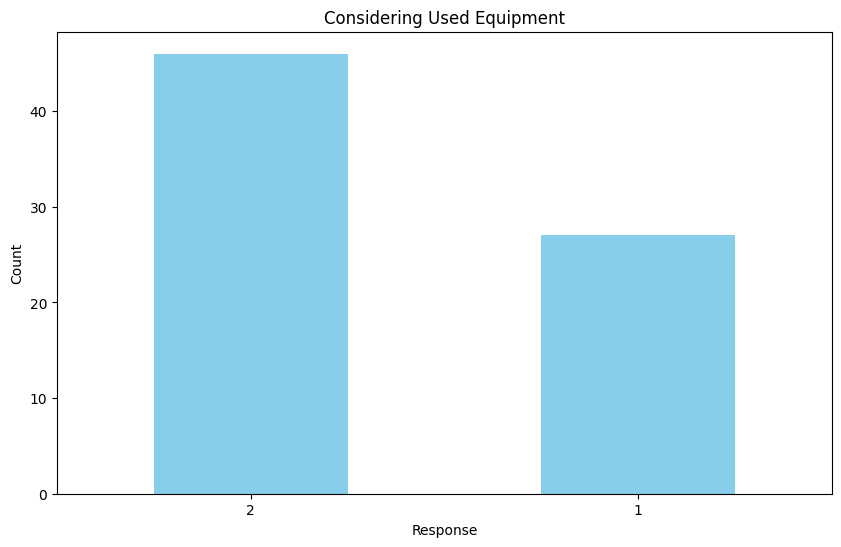

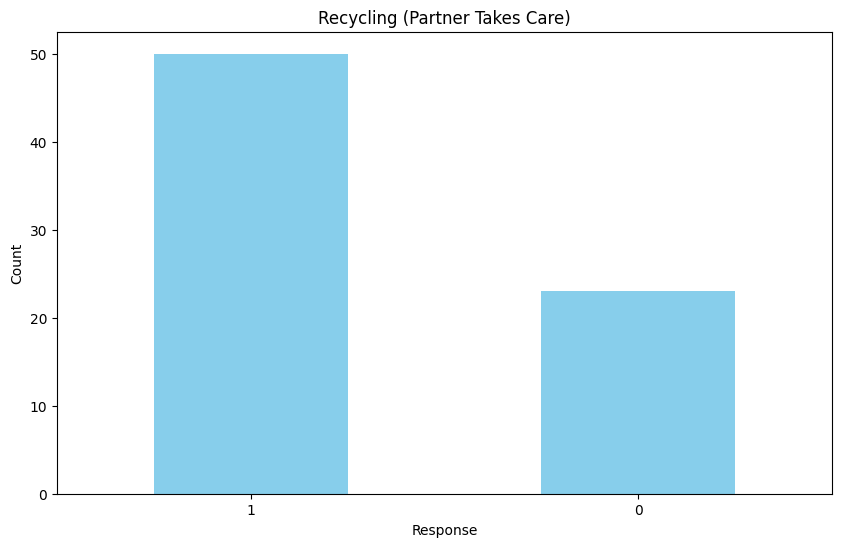

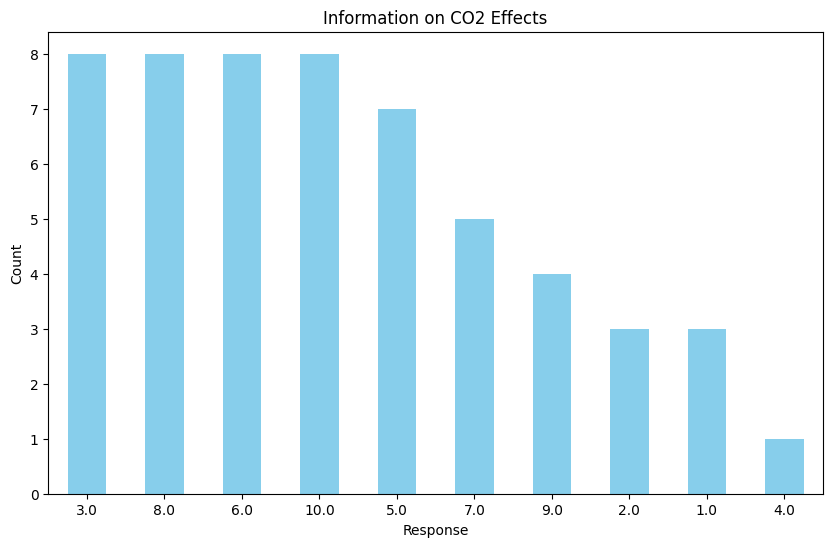

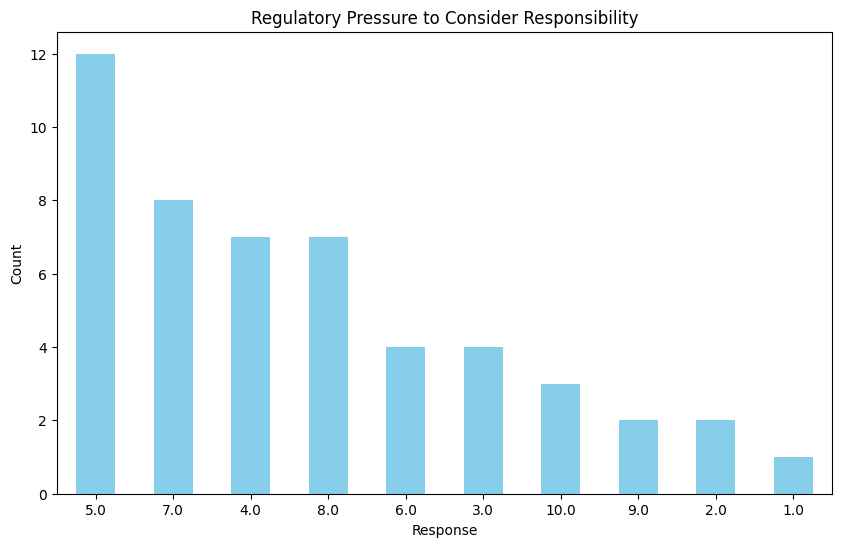

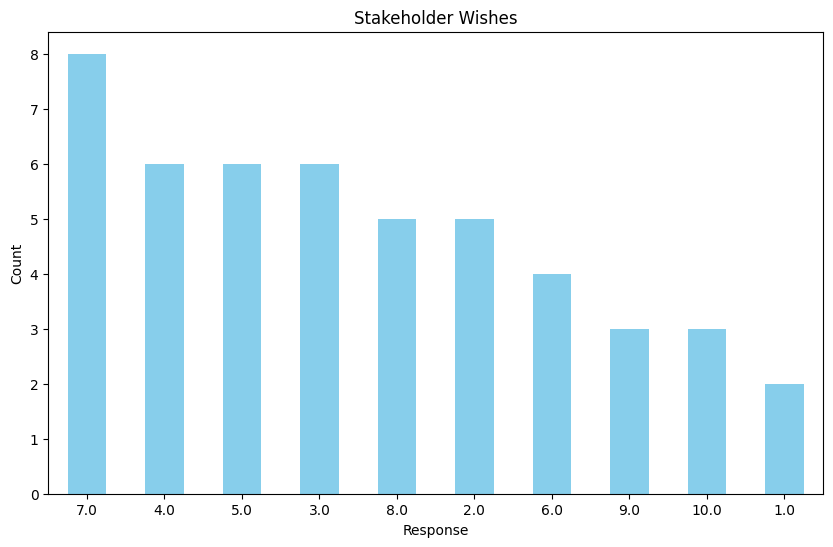

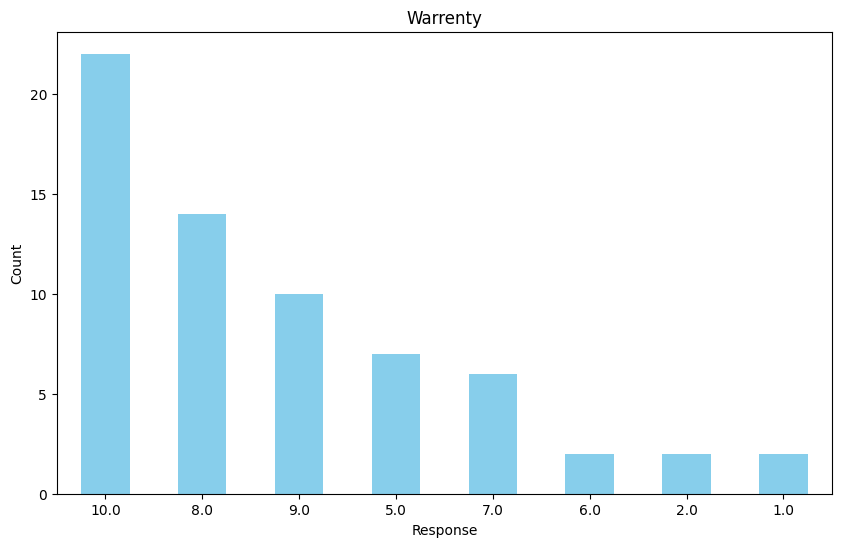

In [12]:
# Function to create bar plots
def plot_bar(data, title):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Considering Used Equipment
plot_bar(consider_used_equipment_count, 'Considering Used Equipment')

# Recycling (Partner Takes Care)
plot_bar(partner_recycling_count, 'Recycling (Partner Takes Care)')

# Information on CO2 Effects
plot_bar(co2_effects_count, 'Information on CO2 Effects')

# Regulatory Pressure to Consider Responsibility
plot_bar(regulatory_pressure_count, 'Regulatory Pressure to Consider Responsibility')

plot_bar(wishes_of_stakeholder_count, 'Stakeholder Wishes')

plot_bar(three_year_warranty_count, 'Warrenty')

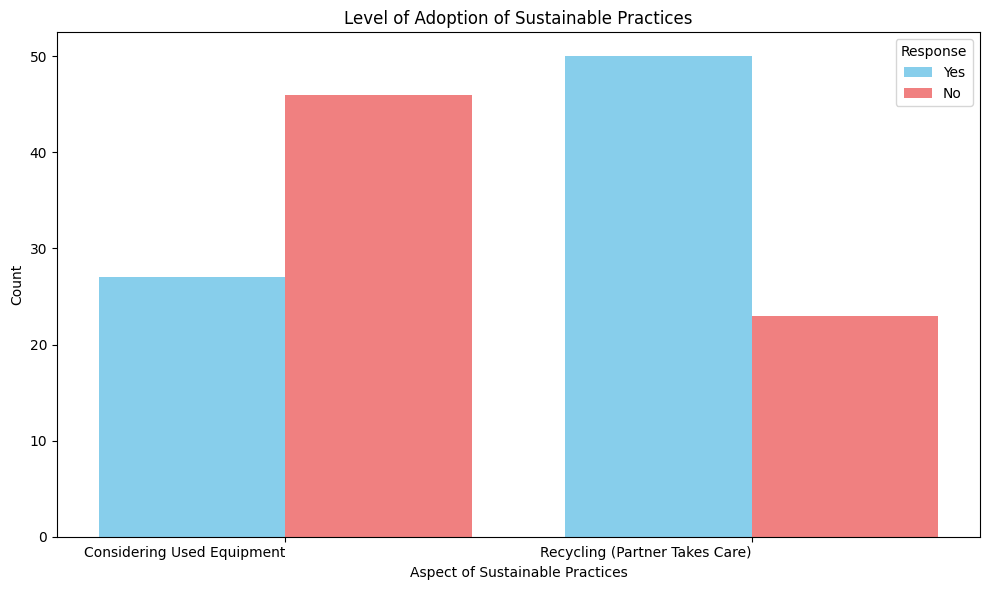

In [13]:


# Data for plotting
consider_used_equipment_count = {1: 27, 2: 46}  # Yes: 27, No: 46
partner_recycling_count = {1: 50, 0: 23}        # Yes: 50, No: 23

# Labels
categories = ['Considering Used Equipment', 'Recycling (Partner Takes Care)']
yes_counts = [consider_used_equipment_count[1], partner_recycling_count[1]]
no_counts = [consider_used_equipment_count[2], partner_recycling_count[0]]

# Bar width
bar_width = 0.4
x = np.arange(len(categories))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Yes
ax.bar(x - bar_width/2, yes_counts, bar_width, label='Yes', color='skyblue')

# Bars for No
ax.bar(x + bar_width/2, no_counts, bar_width, label='No', color='lightcoral')

# Add labels and legend
ax.set_title('Level of Adoption of Sustainable Practices')
ax.set_xlabel('Aspect of Sustainable Practices')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0, ha='right')
ax.legend(title='Response', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


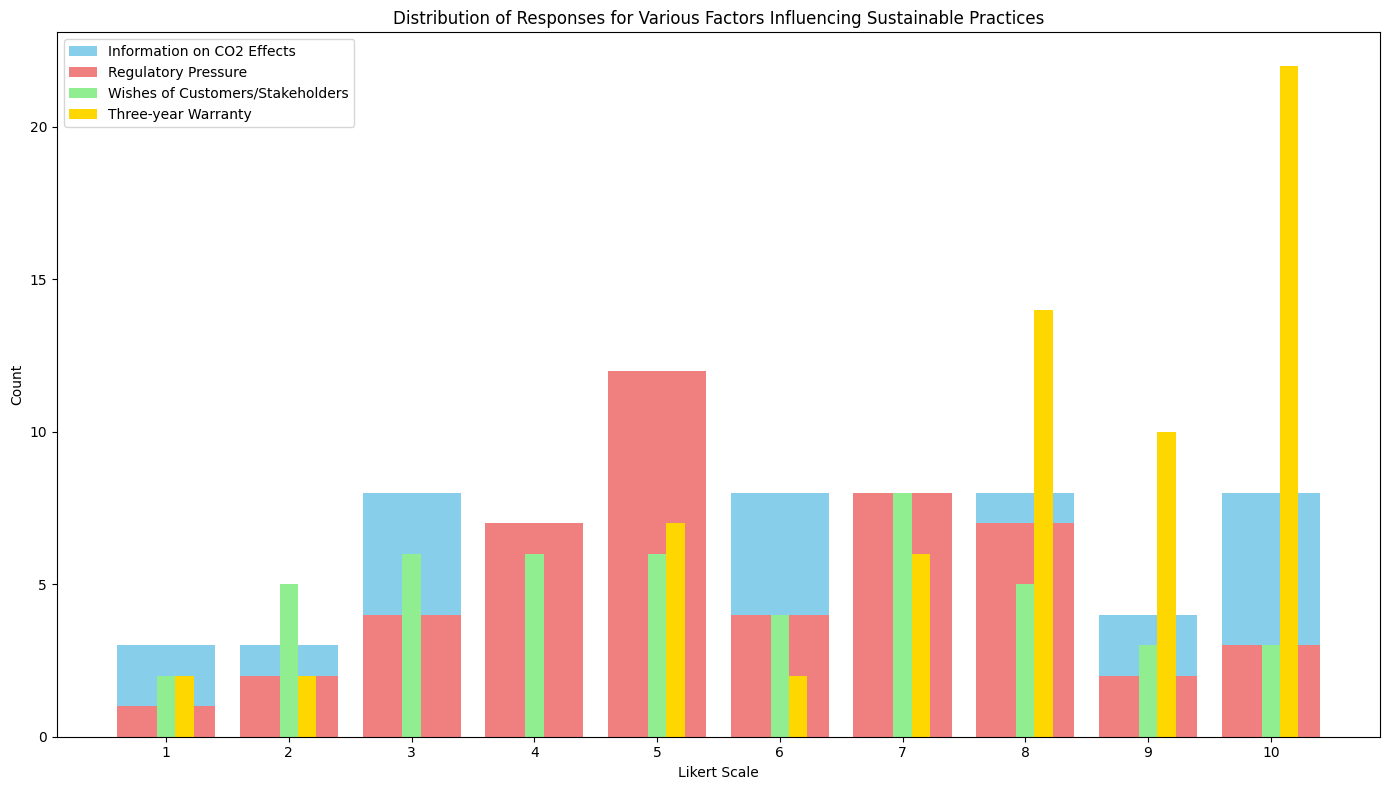

In [14]:
# Do the following characteristics of used equipment affect their purchase? (0 no effect | 3 a little | 5 somewhat | 7 a lot | 10 decisively)								

# Define Likert scale labels for ten-point scale
likert_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Create grouped bar plot
plt.figure(figsize=(14, 8))

# Information on CO2 Effects
co2_effects_values = co2_effects_count.reindex(range(1, 11), fill_value=0).values
plt.bar(np.arange(len(likert_labels)), co2_effects_values, color='skyblue', label='Information on CO2 Effects')

# Regulatory Pressure to Consider Responsibility
regulatory_pressure_values = regulatory_pressure_count.reindex(range(1, 11), fill_value=0).values
plt.bar(np.arange(len(likert_labels)), regulatory_pressure_values, color='lightcoral', label='Regulatory Pressure')

# The wishes of customers and other stakeholders
wishes_customers_stakeholders_values = wishes_of_stakeholder_count.reindex(range(1, 11), fill_value=0).values
plt.bar(np.arange(len(likert_labels)), wishes_customers_stakeholders_values, width=0.15, color='lightgreen', align='center', label='Wishes of Customers/Stakeholders')

# Three-year warranty
three_year_warranty_values = three_year_warranty_count.reindex(range(1, 11), fill_value=0).values
plt.bar(np.arange(len(likert_labels)) + 0.15, three_year_warranty_values, width=0.15, color='gold', align='center', label='Three-year Warranty')

# Add labels and legend
plt.title('Distribution of Responses for Various Factors Influencing Sustainable Practices')
plt.xlabel('Likert Scale')
plt.ylabel('Count')
plt.xticks(np.arange(len(likert_labels)), likert_labels)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# New

In [ ]:

# Handle missing values
data_filled = data.copy()
for col in data.columns:
    if data[col].dtype == 'float64':
        data_filled[col] = data[col].fillna(data[col].mean())
    elif data[col].dtype == 'object':
        data_filled[col] = data[col].fillna(data[col].mode()[0])

# Display the data types and check for missing values
print(data_filled.info())


In [ ]:
#descriptive statistics
descriptive_stats = data_filled.describe()
print(descriptive_stats)


# Factor Analysis: Negative Factors Affecting Used Equipment Purchase
# Analyze and visualize factors that negatively affect the purchase of used ICT equipment.

In [ ]:

# columns for negative factors
negative_factors = [
    'Information security matters',
    'Matters related to the guarantee',
    'Things related to the condition of the device',
    'Opinions of decision makers',
    'Opinions of the technical staff',
    'User opinions'
]

# mean impact score for each factor
factor_means = data_filled[negative_factors].mean()

# Plotting
plt.figure(figsize=(12, 6))
factor_means.sort_values().plot(kind='barh', color='skyblue')
plt.title('Factors Negatively Affecting the Purchase of Used Equipment')
plt.xlabel('Average Impact (0 to 10)')
plt.ylabel('Factors')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Identify Barriers and Enablers for Sustainable Procurement
# Identify and visualize barriers and enablers in the procurement process.

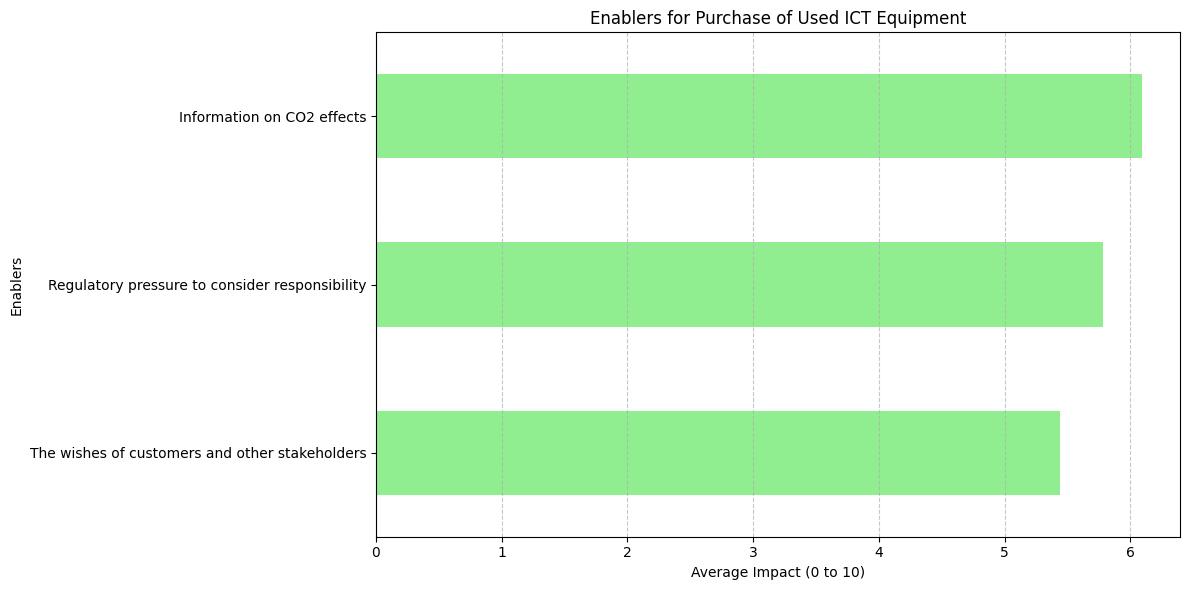

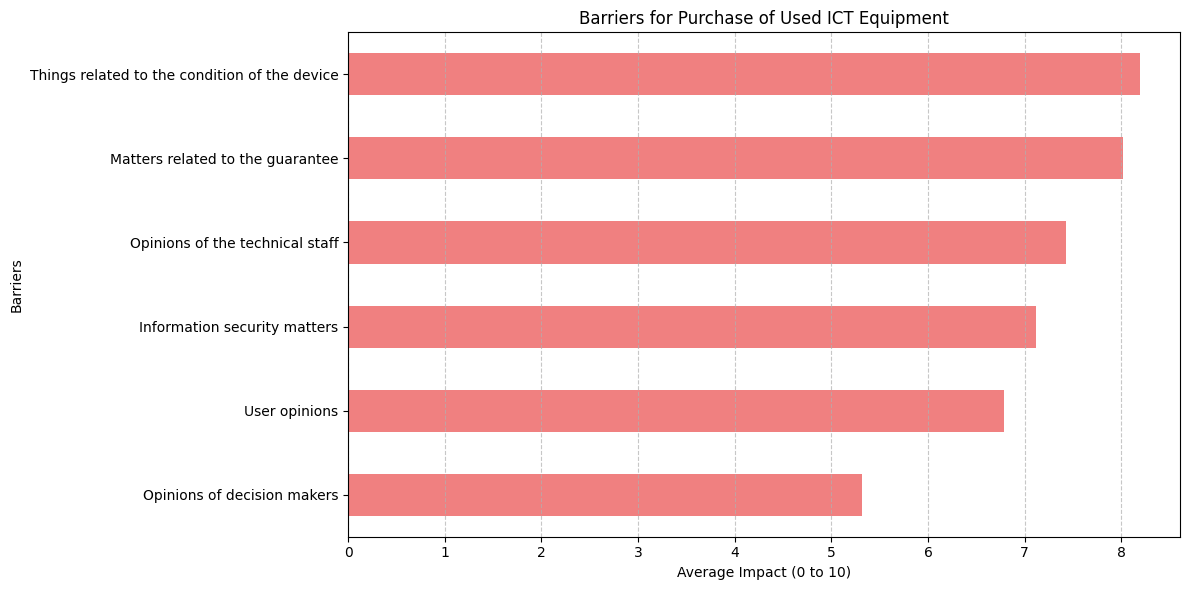

In [15]:
# Define enablers and barriers
enablers = [
    'Information on CO2 effects',
    'Regulatory pressure to consider responsibility',
    'The wishes of customers and other stakeholders'
]

# Calculate mean impact score for each enabler
enabler_means = data[enablers].mean()

# Plotting Enablers
plt.figure(figsize=(12, 6))
enabler_means.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Enablers for Purchase of Used ICT Equipment')
plt.xlabel('Average Impact (0 to 10)')
plt.ylabel('Enablers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Define barriers
barriers = [
    'Information security matters',
    'Matters related to the guarantee',
    'Things related to the condition of the device',
    'Opinions of decision makers',
    'Opinions of the technical staff',
    'User opinions'
]

# Calculate mean impact score for each barrier
barrier_means = data[barriers].mean()

# Plotting Barriers
plt.figure(figsize=(12, 6))
barrier_means.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Barriers for Purchase of Used ICT Equipment')
plt.xlabel('Average Impact (0 to 10)')
plt.ylabel('Barriers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Assessing the importance of price, responsibility, and future trends in ICT equipment purchases.

Mean Importance Score for Price: 6.971830985915493
Mean Importance Score for Responsibility: 5.957746478873239
Proportion of Positive Future Trends: 0.5753424657534246
Proportion of Negative Future Trends: 0.410958904109589


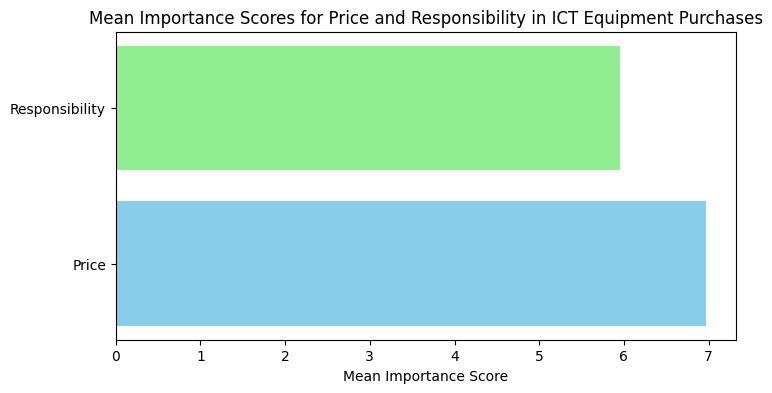

In [16]:
# Renaming columns for easier access
data.rename(columns={
    'How important is price in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)': 'Importance of Price',
    'How important is responsibility in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)': 'Importance of Responsibility',
    'Will the share of responsibility factors increase in your ICT equipment procurement decisions in the next two years?': 'Increase in Responsibility Factors'
}, inplace=True)

# Calculate the mean importance score for price
price_importance_mean = data['Importance of Price'].mean()

# Calculate the mean importance score for responsibility
responsibility_importance_mean = data['Importance of Responsibility'].mean()

# Analyze the future trend
future_trend_counts = data['Increase in Responsibility Factors'].value_counts()

# Calculate the proportion of positive and negative trends
positive_trend_proportion = future_trend_counts[1] / len(data)
negative_trend_proportion = future_trend_counts[2] / len(data)

# Print the results
print(f"Mean Importance Score for Price: {price_importance_mean}")
print(f"Mean Importance Score for Responsibility: {responsibility_importance_mean}")
print(f"Proportion of Positive Future Trends: {positive_trend_proportion}")
print(f"Proportion of Negative Future Trends: {negative_trend_proportion}")

# Calculate means
#sustainability_means = data[['Importance of Price', 'Importance of Responsibility', 'Increase in Responsibility Factors']].mean()

# # Plotting
# plt.figure(figsize=(12, 6))
# sustainability_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
# plt.title('Sustainability Factors in ICT Equipment Procurement')
# plt.xlabel('Factors')
# plt.ylabel('Average Importance (0 to 10)')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# # Rotate x-axis labels
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

# Visualization of the mean importance scores for price and responsibility
plt.figure(figsize=(8, 4))  # Adjust the figure size

# Price importance
plt.barh(['Price'], [price_importance_mean], color='skyblue', label='Price Importance')

# Responsibility importance
plt.barh(['Responsibility'], [responsibility_importance_mean], color='lightgreen', label='Responsibility Importance')

plt.xlabel('Mean Importance Score')
plt.title('Mean Importance Scores for Price and Responsibility in ICT Equipment Purchases')

#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# set y-axis ticks and labels
plt.yticks([0, 1], ['Price', 'Responsibility'])

plt.show()


# 1. Mean Importance Scores:
   - Price: 6.780821917808219
   - Responsibility: 5.794520547945205

   The mean importance scores indicate the relative importance of price and responsibility factors in ICT equipment purchases. 
   Higher scores suggest greater importance.

# Future Trends in Purchasing Used ICT Equipment

The histogram above illustrates the likelihood of organizations increasing their purchases of used ICT equipment in the future. The x-axis represents the likelihood scale ranging from 0 (Not at all likely) to 5 (Definitely likely), while the y-axis indicates the frequency of responses.

By analyzing this data, we gain insights into the future trends in ICT equipment procurement. Higher frequencies towards the right end of the histogram indicate a greater propensity among organizations to consider increasing their purchases of used ICT equipment. This suggests a potential shift in procurement strategies towards the adoption of more sustainable and cost-effective practices in the acquisition of ICT products.

Understanding the likelihood of increasing purchases of used ICT equipment is valuable for organizations in strategic planning and decision-making processes. It informs stakeholders about emerging trends in the ICT procurement landscape, facilitating the alignment of organizational strategies with evolving market dynamics and sustainability objectives.

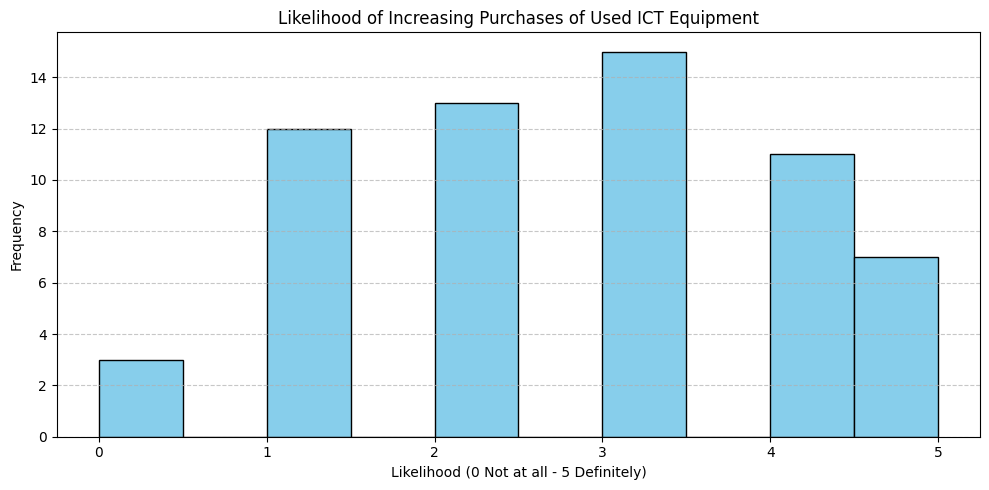

In [17]:
# Column for likelihood of increasing purchases of used equipment
likelihood_col = 'How likely do you see purchases of used ICT equipment to increase in the future in your organization? (0 Not at all | 5 Definitely)'

# Plotting
plt.figure(figsize=(10, 5))
data[likelihood_col].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Likelihood of Increasing Purchases of Used ICT Equipment')
plt.xlabel('Likelihood (0 Not at all - 5 Definitely)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Future Trends of Responsibility factors in ICT Equipment Procurement Decisions:
   - Proportion of Positive Trends: 58.3%
   - Proportion of Negative Trends: 41.7%

   Understanding the future trends helps anticipate shifts in procurement strategies, enabling organizations to adapt 
   and make informed decisions.

The analysis indicates that there is expected positive trends in the share of responsibility factors in ICT equipment procurement decisions 
   over the next two years. 

   These findings are valuable for understanding the evolving landscape of ICT equipment procurement, particularly 
   in terms of integrating responsibility factors into decision-making processes.


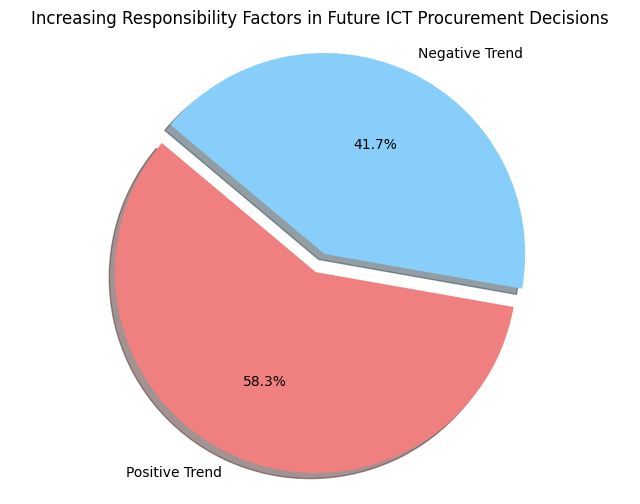

In [20]:
# Visualize the future trends
plt.figure(figsize=(8, 6))
labels = ['Positive Trend', 'Negative Trend']
sizes = [positive_trend_proportion, negative_trend_proportion]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Increasing Responsibility Factors in Future ICT Procurement Decisions')
plt.axis('equal')
plt.show()


# Based on the mean importance scores:

When respondents answered "Yes" to receiving necessary information from their equipment supplier for responsibility work, the mean importance score for responsibility in ICT equipment purchases is 5.875.
When respondents answered "No", the mean importance score is 5.74359.
These mean values suggest that there is a slightly higher perceived importance of responsibility in ICT equipment purchases among those who receive necessary information from their equipment supplier compared to those who do not.







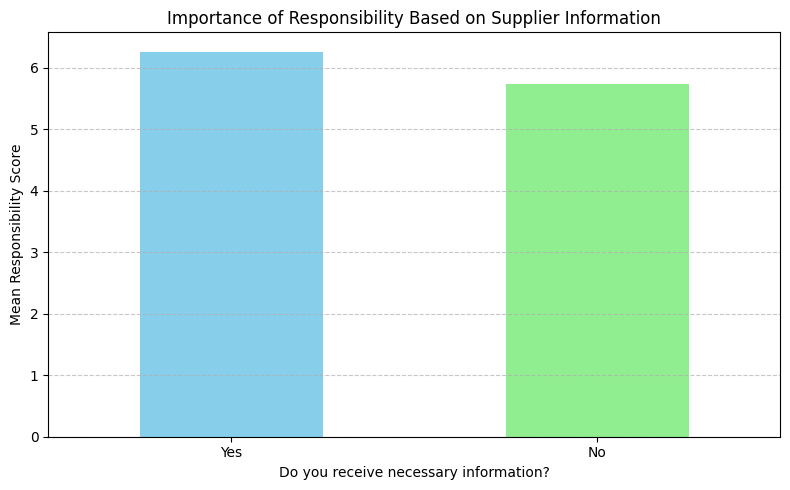

In [22]:

# Filter the data to include only "Yes" (1) and "No" (2) responses
filtered_data = data[data['Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?'].isin([1, 2])]

# Calculate the mean responsibility score for each group
mean_responsibility = filtered_data.groupby('Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?')['Importance of Responsibility'].mean()

# Plotting
plt.figure(figsize=(8, 5))
mean_responsibility.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Importance of Responsibility Based on Supplier Information')
plt.xlabel('Do you receive necessary information?')
plt.ylabel('Mean Responsibility Score')
plt.xticks([0, 1], ['Yes', 'No'])  # Adjust x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()






# Top 5 most used words by the respondents when asked about recieving neccessary data from the supplier for responsibility reporting.

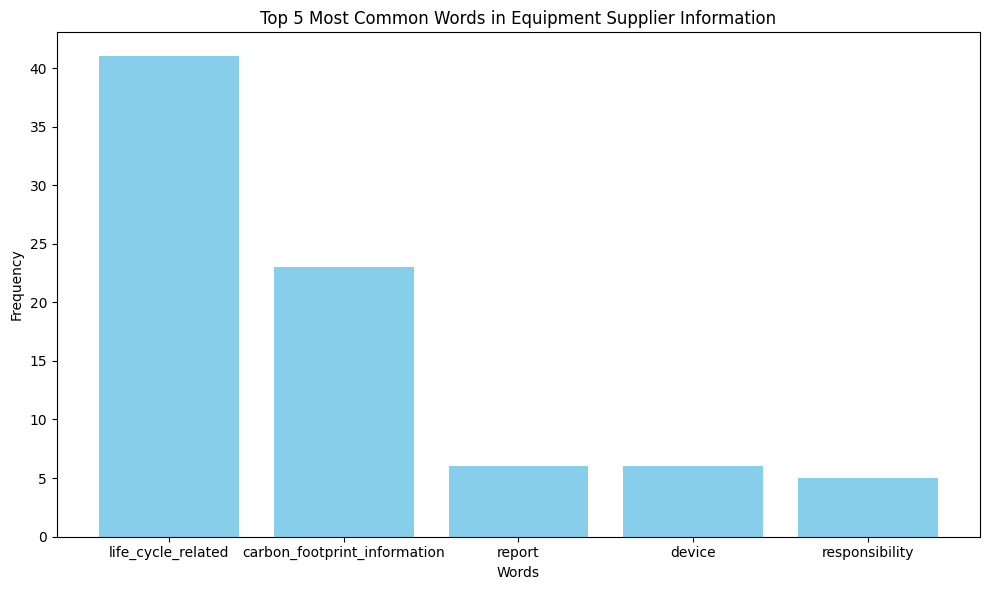

In [32]:
from collections import Counter
import spacy
import string
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Define a function for tokenization
def tokenize_text(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]

# Define a function to preprocess tokens
def preprocess_tokens(tokens):
    preprocessed_tokens = []
    for token in tokens:
        if token.lower() in ['co2', 'co2 emissions', 'co2 footprint', 'carbon footprint data', 'carbon footprint readings', 'co2 measurements']:
            preprocessed_tokens.append('carbon_footprint_information')
        else:
            preprocessed_tokens.append(token)
    return preprocessed_tokens

# Combine the two columns into one
combined_responses = (
    data['What information do you receive from your equipment supplier for your responsibility work?'].fillna('').astype(str) + 
    ' ' + 
    data['What information do you want to receive from your equipment supplier for your responsibility work?'].fillna('').astype(str)
)

# Tokenize the combined responses
tokens = [tokenize_text(response) for response in combined_responses]

# Preprocess the tokens
preprocessed_tokens = [preprocess_tokens(token_list) for token_list in tokens]

# Flatten the list of preprocessed tokens
preprocessed_flat_tokens = [word for sublist in preprocessed_tokens for word in sublist]

# Count the frequency of each word
word_counts = Counter(preprocessed_flat_tokens)

# Remove the combined category if already exists
if 'carbon_footprint_information' in word_counts:
    del word_counts['carbon_footprint_information']

if 'life_cycle_related' in word_counts:
    del word_counts['life_cycle_related']

# Combine the frequencies of similar terms
combined_frequency = sum(word_counts[word] for word in ['co2', 'emissions', 'footprint', 'carbon footprint data', 'footprint', 'readings', 'measurements'])
word_counts['carbon_footprint_information'] = combined_frequency

combined_frequency_life_cycle = sum(word_counts[word] for word in ['energy', 'information', 'equipment', 'recycle', 'recycling', 'disposal', 'use', 'circular', 'life', 'cycle'])
word_counts['life_cycle_related'] = combined_frequency_life_cycle

# Remove the individual terms
for term in ['co2', 'emissions', 'co2 footprint', 'carbon', 'footprint', 'readings', 'measurements', 'data']:
    if term in word_counts:
        del word_counts[term]

for term1 in ['energy', 'information', 'equipment', 'recycle', 'recycling', 'disposal', 'use', 'circular', 'life', 'cycle']:
    if term1 in word_counts:
        del word_counts[term1]

# Remove empty strings and '0' from word_counts if they exist
for key in list(word_counts.keys()):
    if key.strip() == '' or key == '0':
        del word_counts[key]

# Get the most common words and their frequencies
common_words = [word[0] for word in word_counts.most_common(5)]
word_frequencies = [word[1] for word in word_counts.most_common(5)]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(common_words, word_frequencies, color='skyblue')
plt.title('Top 5 Most Common Words in Equipment Supplier Information')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()
